**Importing Dependencies :**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1197,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN
4481,ham,What do u reckon as need 2 arrange transport i...,NaN,NaN,NaN
22,ham,So Ì_ pay first lar... Then when is da stock c...,NaN,NaN,NaN
2766,spam,Married local women looking for discreet actio...,NaN,NaN,NaN
2211,ham,Just gettin a bit arty with my collages at the...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**1.Data Cleaning :**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace= True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()

403

In [13]:
#remove those duplicates
df = df.drop_duplicates(keep='first')
#again check for duplicate values
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

**2.EDA**

In [15]:
#counting the number of hams and spams in the dataset:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

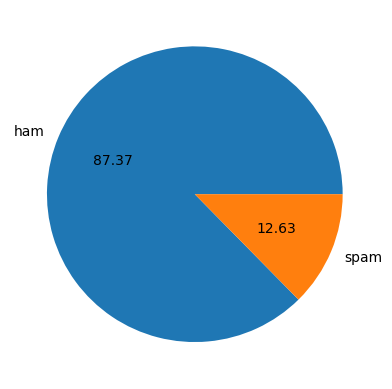

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#creating a seperate column for number of characters
df['num_characters'] = df['text'].apply(len)

In [20]:
#creating a seperate column for number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#describe for spam messages:
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
#describe for ham messages:
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

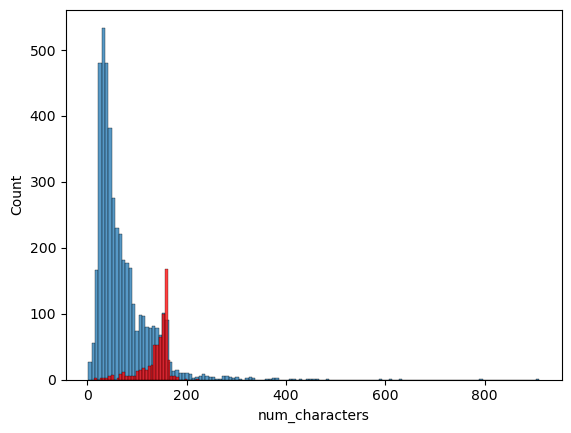

In [27]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
#blue --> ham messages
#red  --> spam messages

E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


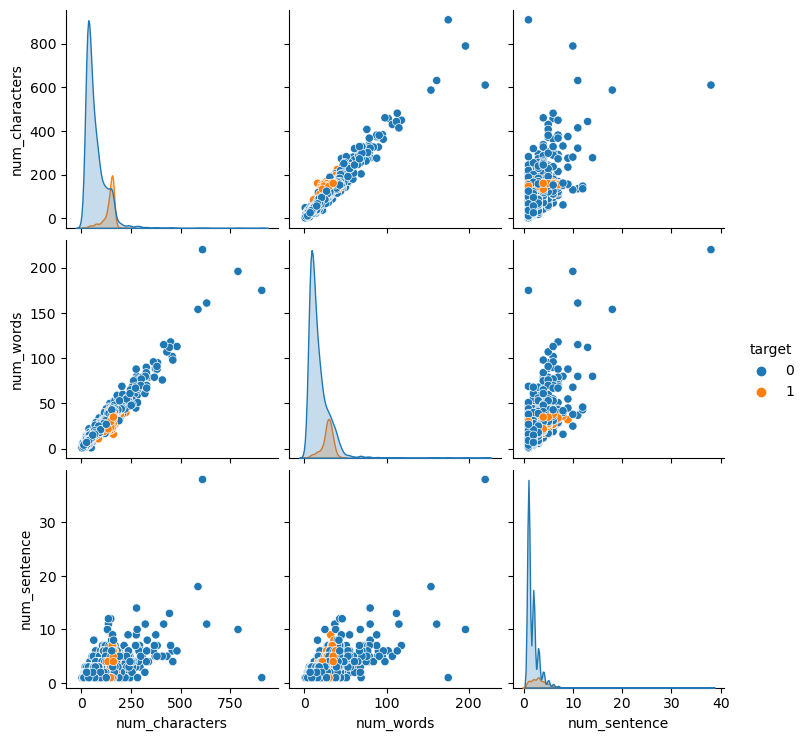

In [28]:
sns.pairplot(df,hue='target')

**3.Data Preprocessing:**

1)lower case

2)Tokenisation

3)Removing special characters

4)Removing stop words and punctuation

5)stemming

In [29]:
#from nltk.corpus import stopwords
#stopwords.words('english')

import nltk
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('drinking')

'drink'

In [31]:
def transform_text(text):
  #lowercase
  text=text.lower()
  #tokenise the words
  text = nltk.word_tokenize(text)
  #remove special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]  #cloning the list y into text
  y.clear()
  #remove stop words and special characters
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]  #cloning the list y into text
  y.clear()
  #stemming the words
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [32]:
import string
from nltk.corpus import stopwords
transform_text('Do u like dancing ?')

'u like danc'

In [33]:
 df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

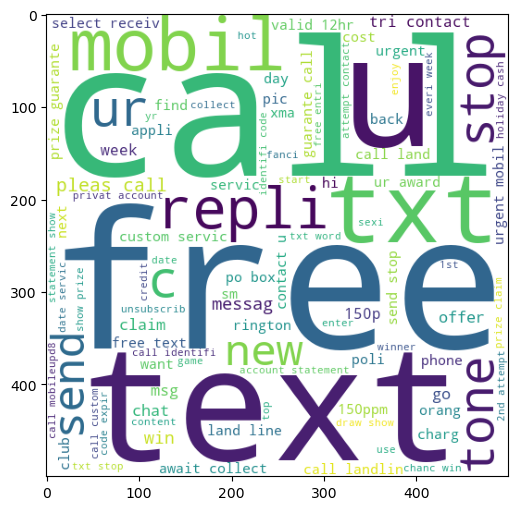

In [37]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

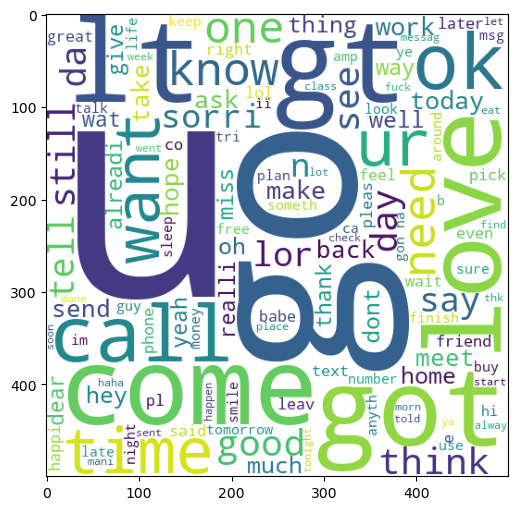

In [38]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [39]:
#spam corpus = set of words in spam messages
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [40]:
 len(spam_corpus)

9939

In [41]:
#building a seperate dataframe for spam_corpus named spam words
#spam_words consist of most repititive 30 words in spam messages
from collections import Counter
spam_words=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['words', 'count'])
print(spam_words)

      words  count
0      call    320
1      free    191
2         2    155
3       txt    141
4      text    122
5         u    119
6        ur    119
7     mobil    114
8      stop    104
9     repli    103
10    claim     98
11        4     97
12    prize     82
13      get     74
14      new     64
15   servic     64
16     tone     63
17     send     60
18   urgent     57
19    nokia     57
20  contact     56
21    award     55
22    phone     52
23     cash     51
24    pleas     51
25     week     49
26      win     48
27        c     45
28  collect     45
29      min     45


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

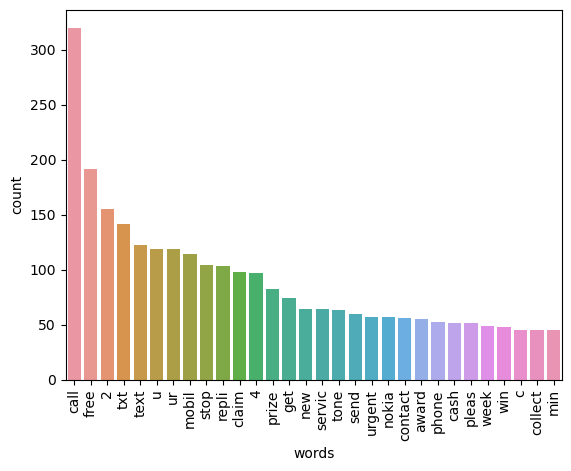

In [42]:
sns.barplot(x='words', y='count', data=spam_words)
plt.xticks(rotation='vertical')

In [43]:
#ham corpus = set of words in ham messages
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [44]:
len(ham_corpus)

35404

In [45]:
#building a seperate dataframe for ham_corpus named ham words
#ham_words consist of most repititive 30 words in ham messages
from collections import Counter
ham_words=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['words', 'count'])
print(ham_words)

    words  count
0       u    883
1      go    404
2     get    349
3      gt    288
4      lt    287
5       2    284
6    come    275
7     got    236
8    know    236
9    like    234
10   call    233
11   time    219
12     ok    217
13   love    216
14   good    213
15   want    208
16     ur    197
17    day    190
18   need    170
19    one    165
20    lor    159
21      4    156
22   home    152
23  think    149
24    see    147
25   take    143
26  still    143
27     da    142
28   tell    133
29   make    129


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

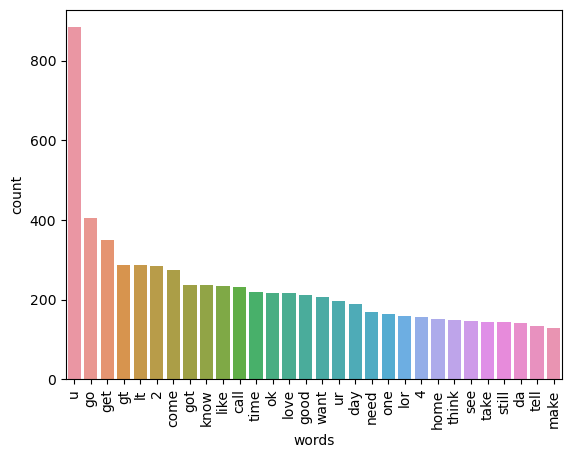

In [46]:
sns.barplot(x='words', y='count', data=ham_words)
plt.xticks(rotation='vertical')

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**4.Model Building:**

**a.CountVectorizer:**

In [48]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [49]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape

(5169, 6708)

In [51]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

**Test and Train Split :**


In [53]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [57]:
mnb.fit(x_train,y_train)
y_pred3 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [58]:
bnb.fit(x_train,y_train)
y_pred2 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


**b.Tfidf Vectorization:**

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X1 = scaler.fit_transform(X1)
X1.shape

(5169, 3000)

In [62]:
Y1 = df['target'].values
Y1

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=2)

In [64]:
gnb.fit(x1_train,y1_train)
y1_pred1 = gnb.predict(x1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [65]:
mnb.fit(x1_train,y1_train)
y1_pred3 = mnb.predict(x1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [66]:
bnb.fit(x1_train,y1_train)
y1_pred2 = bnb.predict(x1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))   #highest accuracy

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [67]:
#tfidf-->MNB

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)  # Replace S with an integer value
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Fixed quotes around 'liblinear'
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=5, random_state=2)  # Removed @ from n_estimators
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)  # Fixed variable name

In [70]:
clfs ={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
}

In [71]:
def train_classifier(clf,a_train,b_train,a_test,b_test):
  clf.fit(a_train,b_train)
  b_pred = clf.predict(a_test)
  accuracy = accuracy_score(b_test,b_pred)
  precision = precision_score(b_test,b_pred)
  return accuracy,precision

In [72]:
train_classifier(svc,x1_train,y1_train,x1_test,y1_test)

(0.9758220502901354, 0.9747899159663865)

In [73]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x1_train,y1_train,x1_test,y1_test)
  print( "For ",name)
  print("Accuracy ",current_accuracy)
  print("Precision ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy  0.9758220502901354
Precision  0.9747899159663865
For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  NB
Accuracy  0.9709864603481625
Precision  1.0
For  DT
Accuracy  0.9284332688588007
Precision  0.82
For  LR
Accuracy  0.9584139264990329
Precision  0.9702970297029703
For  RF
Accuracy  0.9758220502901354
Precision  0.9829059829059829
For  AdaBoost
Accuracy  0.9110251450676983
Precision  0.9107142857142857
For  BgC
Accuracy  0.9584139264990329
Precision  0.8682170542635659
For  ETC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
For  GBDT
Accuracy  0.9468085106382979
Precision  0.9191919191919192


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Accuracy', ascending=False)

In [75]:
print(performance_df)
#RF and NB has highest Precision
#SVC and ETC has highest Accuracy
#RF and ETC are more or less same

  Algorithm  Accuracy  Precision
0       SVC  0.975822   0.974790
5        RF  0.975822   0.982906
8       ETC  0.974855   0.974576
2        NB  0.970986   1.000000
4        LR  0.958414   0.970297
7       BgC  0.958414   0.868217
9      GBDT  0.946809   0.919192
3        DT  0.928433   0.820000
6  AdaBoost  0.911025   0.910714
1        KN  0.905222   1.000000


In [76]:
#reshaping the accuracy and precision table of different algorithms:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")
print(performance_df1)

   Algorithm   variable     value
0        SVC   Accuracy  0.975822
1         RF   Accuracy  0.975822
2        ETC   Accuracy  0.974855
3         NB   Accuracy  0.970986
4         LR   Accuracy  0.958414
5        BgC   Accuracy  0.958414
6       GBDT   Accuracy  0.946809
7         DT   Accuracy  0.928433
8   AdaBoost   Accuracy  0.911025
9         KN   Accuracy  0.905222
10       SVC  Precision  0.974790
11        RF  Precision  0.982906
12       ETC  Precision  0.974576
13        NB  Precision  1.000000
14        LR  Precision  0.970297
15       BgC  Precision  0.868217
16      GBDT  Precision  0.919192
17        DT  Precision  0.820000
18  AdaBoost  Precision  0.910714
19        KN  Precision  1.000000


E:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


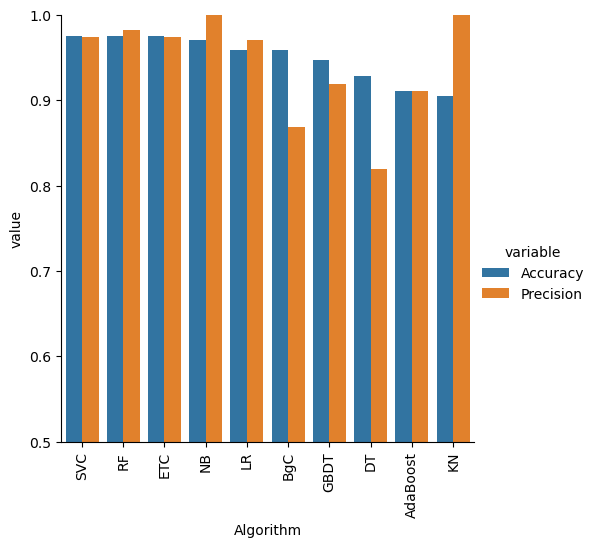

In [77]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
#model improve
#1.Change the max features parameter of Tfidf

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [80]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores})

In [81]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [82]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores})

In [84]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822
1,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855
3,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414
5,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414
6,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809
7,DT,0.928433,0.820000,0.928433,0.820000,0.928433,0.820000,0.928433
8,AdaBoost,0.911025,0.910714,0.911025,0.910714,0.911025,0.910714,0.911025
9,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222


In [85]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [86]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [87]:
voting.fit(x1_train,y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
mnb.fit(x1_train, y1_train)

MultinomialNB()

In [96]:
y_pred = voting.predict(x1_test)
print("Accuracy",accuracy_score(y1_test,y_pred))
print("Precision",precision_score(y1_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [97]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(x1_train,y1_train)
y_pred = clf.predict(x1_test)
print("Accuracy",accuracy_score(y1_test,y_pred))
print("Precision",precision_score(y1_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [101]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))